In [55]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm

Wiener process

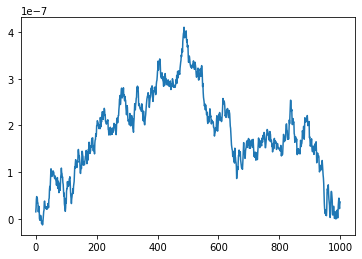

In [13]:
dt=1e-4
delta=0.01
give_step = lambda dt, delta: np.random.normal(scale=dt*delta**2)
steps = [give_step(dt, delta)]
for k in range(10**3):
    steps.append(steps[-1] + give_step(dt, delta))
plt.plot(steps)

Covariance evolution

In [ ]:
dx = (A - tmp*C)*x*dt + (tmp*dy)


In [31]:
def ct(A):
    return np.conjugate(np.transpose(A))

In [127]:
covs = []
means = []

#define parameters
gamma = 0.3 # cavity decay rate
Gamma = 0.8 #measurement rate
eta = 1 # measurement efficiency
n = 10 # number of photons?

C= np.diag([np.sqrt(4*eta*Gamma)]*2)
A = np.diag([-0.5*gamma]*2)
D = np.diag([gamma*(n+0.5) + Gamma]*2)
Gamma_matrix = np.zeros((2,2))

## initial condition (stationary case)
su = eta + 0.5 + Gamma/gamma
cov_in = np.diag([(np.sqrt(1+ 16*eta*Gamma*su) -1)*gamma/(8*eta*Gamma)]*2)
x_in = np.array([0,0])

dt = 1e-3
covs = [cov_in]
means = [x_in]
Nt = 10000
for k in tqdm(range(Nt)):
    
    x = means[-1]
    cov = covs[-1]
    
    tmp = np.dot(cov, ct(C)) + ct(Gamma_matrix)
    
    dy = np.dot(C, x + np.dot(np.linalg.inv(C), (np.random.randn(2)*Nt/np.sqrt(dt))))*dt  
    
    dx = np.dot(A - np.dot(tmp,C), x)*dt + np.dot(tmp, dy)
    dcov = (np.dot(A,cov) + np.dot(cov, ct(A)) + D - np.dot(tmp, ct(tmp)))*dt
    
    covs.append(covs[-1] + dcov)
    means.append(means[-1] + dx)

100%|██████████| 10000/10000 [00:00<00:00, 11468.52it/s]


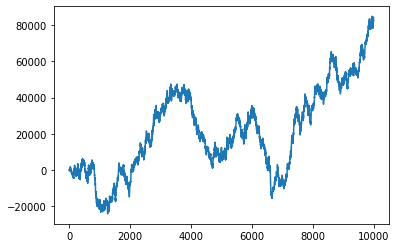

In [131]:
plt.plot([means[k][1] for k in range(len(means))])